#### 1. Import Library

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#### 2. Memuat data dari URL

In [68]:
url = "https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json"
response = requests.get(url)
data = response.json()

#### 3. Membuat DataFrame dari data JSON

In [60]:
df = pd.DataFrame(data)


#### 4. Konversi harga transaksi ke dalam satuan rupiah (IDR). Anggap kurs EUR to IDR adalah 17000

In [61]:
df['trade_price_idr'] = df['trade_price'] * 17000
df

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency,trade_price_idr
0,1,GOOGL,1/5/2017,3,675.51,501030,1,1,sell,EUR,11483670.0
1,2,NVDA,3/27/2017,13,559.39,51823,2,2,buy,ZAR,9509630.0
2,3,NFLX,11/7/2015,0,811.33,684430,3,3,sell,ZWL,13792610.0
3,4,MSFT,5/29/2017,22,231.21,237465,4,4,buy,IDR,3930570.0
4,5,JPM,11/8/2012,16,699.15,800344,5,5,buy,HRK,11885550.0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208.69,54629,996,996,buy,CNY,3547730.0
996,997,GOOGL,9/24/2018,9,829.10,365834,997,997,sell,RUB,14094700.0
997,998,MSFT,5/2/2012,16,346.35,891372,998,998,sell,EUR,5887950.0
998,999,NVDA,10/9/2010,0,935.36,483631,999,999,sell,PKR,15901120.0


#### 5. Harga beli saham tertinggi dalam rupiah (IDR) dan Visualisasi

1. Harga beli saham tertinggi dalam rupiah (IDR): 16946790.0


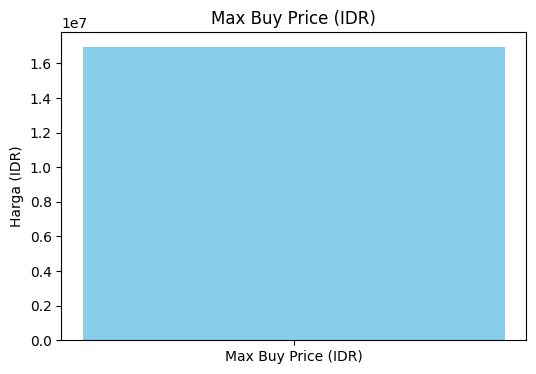

In [62]:
max_buy_price = df[df['trade_type'] == 'buy']['trade_price_idr'].max()
print("1. Harga beli saham tertinggi dalam rupiah (IDR):", max_buy_price)

# Visualisasi
plt.figure(figsize=(6, 4))
plt.bar(['Max Buy Price (IDR)'], [max_buy_price], color='skyblue')
plt.title('Max Buy Price (IDR)')
plt.ylabel('Harga (IDR)')
plt.show()

#### 6. Perkembangan transaksi pembelian saham TSLA dan Visualisasi

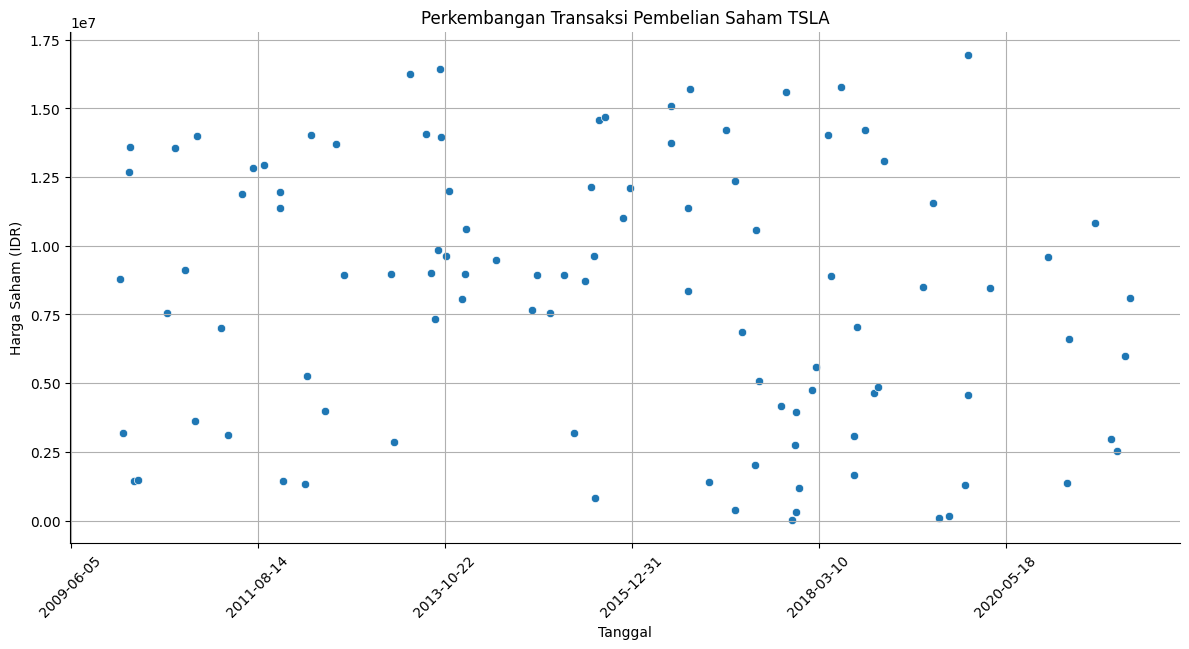

In [63]:
tsla_transactions = df[df['stock_symbol'] == 'TSLA'].copy()  # Menggunakan .copy() untuk menghindari SettingWithCopyWarning
tsla_transactions['trade_date'] = pd.to_datetime(tsla_transactions['trade_date'])

# Memperkecil interval label pada sumbu x
tsla_transactions = tsla_transactions.sort_values(by='trade_date')
tsla_transactions['trade_date'] = tsla_transactions['trade_date'].dt.date

# Visualisasi dengan relplot jenis 'scatter'
sns.relplot(data=tsla_transactions, x='trade_date', y='trade_price_idr', kind='scatter', height=6, aspect=2)
plt.title('Perkembangan Transaksi Pembelian Saham TSLA')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (IDR)')
plt.xticks(rotation=45)  # Memutar label sumbu x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))  # Mengatur jumlah label sumbu x yang ditampilkan
plt.grid(True)
plt.show()

#### 7. Persentase jenis saham yang dilakukan proses jual-beli dan Visualisasi


3. Persentase jenis saham yang dilakukan proses jual-beli:
stock_symbol
DIS      10.7
JPM      10.6
FB       10.6
GOOGL    10.5
AMZN     10.2
NFLX     10.1
TSLA     10.1
NVDA     10.0
MSFT      9.7
AAPL      7.5
Name: proportion, dtype: float64


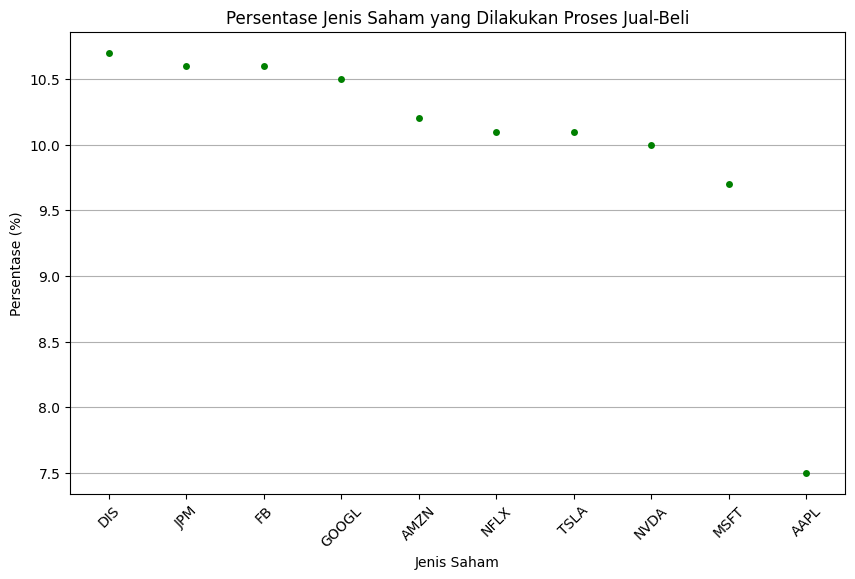

In [64]:
stock_type_percentage = df['stock_symbol'].value_counts(normalize=True) * 100
print("\n3. Persentase jenis saham yang dilakukan proses jual-beli:")
print(stock_type_percentage)

# Visualisasi dengan stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x=stock_type_percentage.index, y=stock_type_percentage.values, color='green', jitter=True)
plt.title('Persentase Jenis Saham yang Dilakukan Proses Jual-Beli')
plt.xlabel('Jenis Saham')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### 8. Jenis transaksi yang banyak dilakukan (buy / sell)


4. Jenis transaksi yang banyak dilakukan:
trade_type
buy     510
sell    490
Name: count, dtype: int64


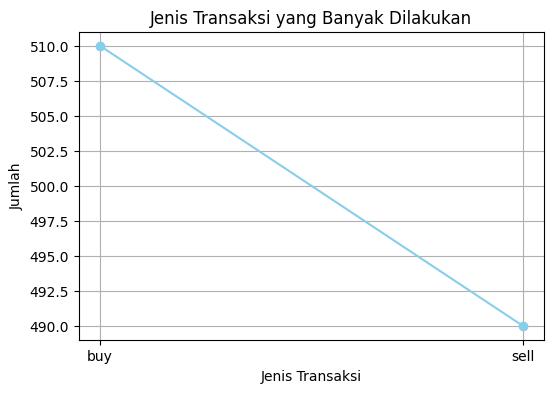

In [65]:
transaction_type_counts = df['trade_type'].value_counts()
print("\n4. Jenis transaksi yang banyak dilakukan:")
print(transaction_type_counts)

# Visualisasi dengan plot garis
plt.figure(figsize=(6, 4))
plt.plot(transaction_type_counts.index, transaction_type_counts.values, marker='o', color='skyblue', linestyle='-')
plt.title('Jenis Transaksi yang Banyak Dilakukan')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

#### 9. Persentase jenis transaksi yang dilakukan


5. Persentase jenis transaksi yang dilakukan:
trade_type
buy     51.0
sell    49.0
Name: proportion, dtype: float64


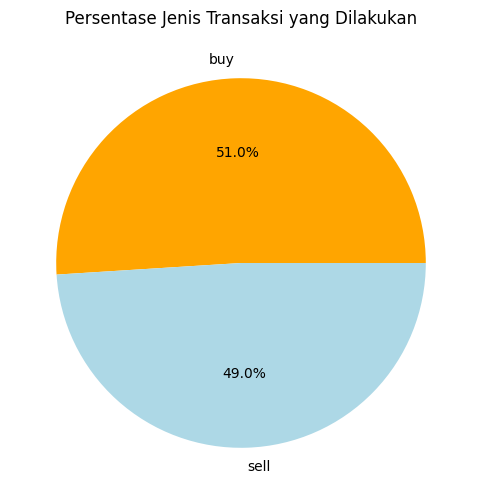

In [66]:
transaction_type_percentage = df['trade_type'].value_counts(normalize=True) * 100
print("\n5. Persentase jenis transaksi yang dilakukan:")
print(transaction_type_percentage)

# Visualisasi dengan pie plot
plt.figure(figsize=(6, 6))
plt.pie(transaction_type_percentage, labels=transaction_type_percentage.index, autopct='%1.1f%%', colors=['orange', 'lightblue'])
plt.title('Persentase Jenis Transaksi yang Dilakukan')
plt.show()

#### 10. Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham


6. Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham:
trade_year
2010    1.012951e+07
2011    7.845655e+06
2012    8.695413e+06
2013    8.614236e+06
2014    8.700055e+06
2015    8.828825e+06
2016    8.862578e+06
2017    7.920304e+06
2018    7.432128e+06
2019    8.837680e+06
2020    8.415984e+06
2021    8.244891e+06
Name: trade_price_idr, dtype: float64


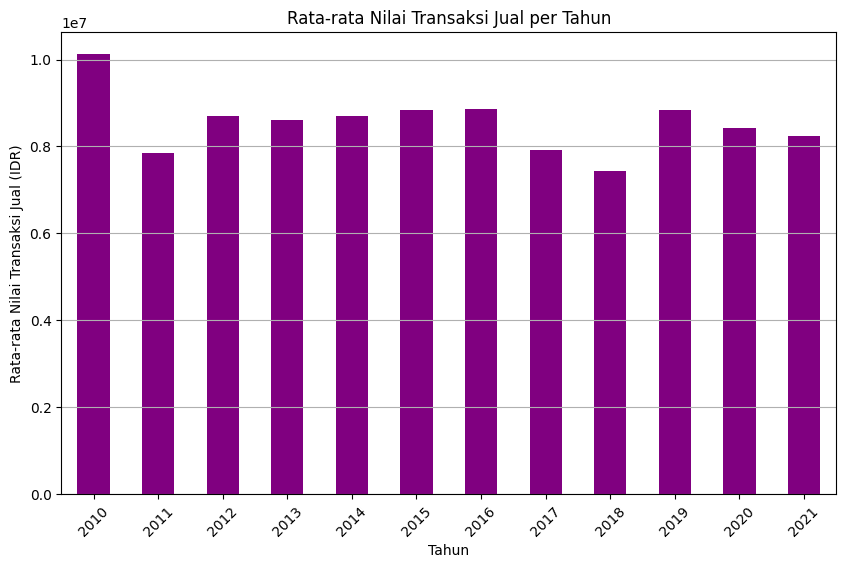

In [67]:
df['trade_date'] = pd.to_datetime(df['trade_date'])
df['trade_year'] = df['trade_date'].dt.year
average_sell_price_by_year = df[df['trade_type'] == 'sell'].groupby('trade_year')['trade_price_idr'].mean()
print("\n6. Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham:")
print(average_sell_price_by_year)

# Visualisasi
plt.figure(figsize=(10, 6))
average_sell_price_by_year.plot(kind='bar', color='purple')
plt.title('Rata-rata Nilai Transaksi Jual per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai Transaksi Jual (IDR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()